In HU, the distance is given by
$d(z) = R_0 \frac{z}{(1+z)}$

the 4D radius is given by:
$R(z) = R_0 \frac{1}{(1+z)}$

where $R_0$ = 14.01 GLY
$G(t) = G_0\frac{R_0}{R(z)}$

$G = G_0 (1+z)$

Using Newtonian Dynamics while reversing time (having the average galaxy moving back in time and through the 4D spatial manifold), we get:
$G(z)\frac{M}{r(z)^2} = \frac{v(z)^2}{r(z)}$

r(z)=$G(z)\frac{M}{v(z)^2}=G_0 (1+z)\frac{M}{v(z)^2}$

Since the angular size of a galaxy is roughly r(z)/d(z)

AngularSize= $G_0 (1+z)\frac{M}{v(z)^2}/(R_0\frac{z}{(1+z)})= \frac{G_0M(1+z)^2}{R_0  z v(z)^2} \propto \frac{1}{z}$

This means that v(z) =$ v_0(1+z)$ which implies that $r(z) = r_0/(1+z)$

where $R_0$ is the current 4D radius (14.01 GLY), and $v_0$ is the current tangential velocity of a body in orbit.

So, as G varies, the radius of the orbits varies, and velocity adjusts to keep angular momentum constant. The resulting angular size z-dependency is $\frac{1}{z} $as depicted in Kapahi’s data.

**NOTICE THAT THIS IS NOT A SMALL RESULT. I DERIVED THE Z-DEPENDENCY OF THE ANGULAR SIZE (AN OBSERVABLE) IN AN EPOCH-DEPENDENT G. THIS HAS NEVER BEEN DONE, AND IT SUPPORTS MY THEORY AND DEBUNKS GENERAL RELATIVITY.**

**JWST'S OBSERVATION OF HUGE GALAXIES IS THE RESULT OF INCORRECT GALAXY SIZE PREDICTIONS AND DISTRIBUTION DUE TO RIEMMANIAN GEOMETRY: NO IFS OR BUTS.**


In [ ]:
import matplotlib
matplotlib.use('TkAgg')  # Use the TkAgg backend (or another appropriate one)
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from hugalaxy import GalaxyWrapper, calculate_density_parameters, move_rotation_curve
from hugalaxy.plotting import plotRotationCurve
from hugalaxy.calibration import calibrate_density_coefficients
from timeit import default_timer as timer

####################################################
# MODELING M33 GALAXY
####################################################

m33_rotational_curve = np.array( [
    [0.0, 0.0],
    [1508.7187, 38.674137],
    [2873.3889, 55.65067],
    [4116.755, 67.91063],
    [5451.099, 79.22689],
    [6846.0957, 85.01734],
    [8089.462, 88.38242],
    [9393.48, 92.42116],
    [10727.824, 95.11208],
    [11880.212, 98.342697],
    [13275.208, 99.82048],
    [14609.553, 102.10709],
    [18521.607, 104.25024],
    [22403.336, 107.60643],
    [26406.369, 115.40966],
    [30379.076, 116.87875],
    [34382.107, 116.05664],
    [38354.813, 117.93005],
    [42266.87, 121.42091],
    [46300.227, 128.55017],
    [50212.285, 132.84966]
])

print(np.shape(m33_rotational_curve))

M33_Distance = 3.2E6
Radius_Universe_4D = 14.01E9
redshift = M33_Distance / (Radius_Universe_4D - M33_Distance)
nr = 320
# NZ should always be ODD
nz = 101
ntheta = 180
R_max = 50000.0

rho_0, alpha_0, rho_1, alpha_1, h0 = calculate_density_parameters(redshift)
GalaxyMass = 5E10
# Create The Galaxy
M33 = GalaxyWrapper(GalaxyMass, rho_0, alpha_0, rho_1, alpha_1, h0, R_max, nr,
                    nz, ntheta, redshift,GPU_ID=0, cuda=True, taskflow=True)
M33.density_wrapper_internal()
M33.read_galaxy_rotation_curve(m33_rotational_curve)
data=calibrate_density_coefficients(m33_rotational_curve, redshift, M33)
data

In [7]:
import numpy as np
import pandas as pd

# data = np.array([[5.401022e+00, 2.025247e-04, 5.071864e-01, 4.185293e-05, 8.483170e+04],
# [4.122579e+01, 3.955117e-04, 9.754558e+03, 3.279913e-02, 4.231283e+04],
# [1.201611e+02, 5.551675e-04, 1.153513e+01, 5.557322e-07, 4.765964e+04],
# [3.037697e+01, 2.833134e-04, 2.481858e+02, 4.813467e-07, 2.701566e+05],
# [5.797942e+02, 9.498202e-04, 5.270514e+01, 1.542805e-06, 4.717766e+04],
# [1.101392e+03, 1.184728e-03, 1.186051e+04, 7.720785e-02, 1.425049e+04],
# [1.584580e+03, 1.307394e-03, 2.779467e+05, 6.896715e-02, 1.214620e+04],
# [2.511031e+03, 1.546376e-03, 2.675446e+02, 7.094054e-04, 1.318964e+04],
# [3.281144e+03, 1.668436e-03, 1.826293e+02, 4.860785e-06, 1.984747e+04],
# [4.755237e+02, 6.909864e-04, 3.893927e+03, 3.101007e-06, 2.111670e+05],
# [6.289090e+02, 7.690313e-04, 5.385344e+03, 3.842067e-06, 2.263130e+05],
# [3.306720e+02, 3.324108e-04, 9.233530e+03, 5.603549e-06, 3.723951e+03],
# [9.232934e+03, 2.362381e-03, 1.533852e+03, 1.027389e-05, 3.514502e+04],
# [6.165514e+02, 4.898762e-04, 1.196861e+04, 6.234798e-06, 4.015003e+04],
# [1.429531e+03, 9.112822e-04, 1.733104e+04, 9.467442e-06, 1.423774e+05],
# [1.535097e+04, 2.789561e-03, 4.709116e+03, 1.425803e-05, 2.324758e-02],
# [2.083408e+03, 1.064454e-03, 2.032127e+04, 9.539655e-06, 1.692584e+05],
# [2.785797e+03, 1.269837e-03, 2.024822e+04, 8.859366e-06, 2.201406e+05],
# [9.667884e+03, 2.279271e-03, 2.021831e+04, 1.293048e-05, 8.114376e+04],
# [7.383276e+04, 6.694989e-03, 6.088998e+02, 1.601008e-08, 1.966759e+04]])

data = np.array(
[[4.753967e+00, 1.799589e-04, 2.900467e+00, 6.321158e-07, 5.338611e+04],
[6.052052e+00, 1.660799e-04, 5.003779e+01, 2.473436e-07, 2.441736e+05],
[7.681483e+01, 4.580780e-04, 1.899200e+06, 1.922566e-02, 3.074577e+04],
[1.205820e+01, 1.289360e-04, 3.128300e+02, 5.433664e-07, 7.596625e+04],
[1.008420e+01, 1.642682e-05, 5.598389e+02, 7.256209e-07, 2.592406e+02],
[6.689991e+01, 3.004849e-04, 1.050332e+03, 1.357024e-06, 1.252008e+05],
[1.542842e+03, 1.306414e-03, 2.343590e+02, 2.972524e-05, 1.424761e+04],
[1.626656e+03, 1.298789e-03, 6.250739e+06, 3.478012e-02, 1.184164e+04],
[1.842059e+02, 3.803801e-04, 3.296520e+03, 2.822496e-06, 8.771240e+03],
[2.115571e+02, 3.759119e-04, 4.222983e+03, 3.033955e-06, 7.436046e+03],
[2.698120e+02, 3.943548e-04, 5.702813e+03, 3.753727e-06, 6.413850e+03],
[3.693943e+02, 4.592024e-04, 6.530952e+03, 3.955400e-06, 6.285300e+03],
[2.790519e+02, 2.907110e-04, 7.395337e+03, 3.744684e-06, 3.368043e+03],
[4.158191e+02, 3.972363e-04, 9.680664e+03, 4.645857e-06, 4.173779e+03],
[9.389718e+02, 6.849166e-04, 1.494977e+04, 7.991212e-06, 5.614754e+03],
[6.661112e+02, 4.948771e-04, 1.618942e+04, 6.929298e-06, 2.040821e+03],
[6.771637e+02, 3.986916e-04, 1.619893e+04, 6.511077e-06, 2.592263e+03],
[1.111298e+03, 6.360449e-04, 2.460118e+04, 9.652000e-06, 4.132574e+03],
[1.527142e+03, 7.536392e-04, 2.403664e+04, 9.510833e-06, 1.147475e+04],
[2.248710e+03, 9.861901e-04, 2.965061e+04, 1.126825e-05, 3.058635e-02],
]
)
                 
df = pd.DataFrame(data=data, columns=["rho_0","alpha_0", "rho_1", "alpha_1", "h0"])
Radius_4D = 14.01E9
r4d = Radius_4D/(1+df.index)
df["redshift_birth"]=df.index
df["r4d"]=r4d
# Assuming you have the DataFrame df with the required columns

# Calculate log(r4d) column
df['log_r4d'] = np.log10(14 / (1 + df['redshift_birth']))
# Define the degree of the polynomial fit
degree = 1

# Create an empty dictionary to store the fitting coefficients
fitting_coeffs = {}

# Loop over the columns to calculate the fitting coefficients
for column in ['rho_0', 'alpha_0', 'rho_1', 'alpha_1', 'h0']:
    # Calculate log(column) column
#     df['log_' + column] = np.log10(df[column])
    df['log_' + column] = np.log10(df[column].to_numpy())


    # Perform the polynomial fit using numpy.polyfit
    fit_coeffs = np.polyfit(df['log_r4d'], df['log_' + column], degree)

    # Store the fitting coefficients in the dictionary
    fitting_coeffs[column] = fit_coeffs

# Print the fitting coefficients
for column, coeffs in fitting_coeffs.items():
    print('pow(r4d, {}) * pow(10, {}),'.format(coeffs[0],coeffs[1]))


pow(r4d, -2.0657216463762667) * pow(10, 2.7943896569579816),
pow(r4d, -0.5668439581742767) * pow(10, -3.298882971596255),
pow(r4d, -2.1617830116917673) * pow(10, 4.204222877497562),
pow(r4d, -0.3669214726884909) * pow(10, -5.009911771314721),
pow(r4d, 2.0033273052624003) * pow(10, 3.26680459614064),


(21, 2)
M0 = 34.5314
M1 = 1.17486
Total SummedUp Mass Calculated from summing up cells 33.7869


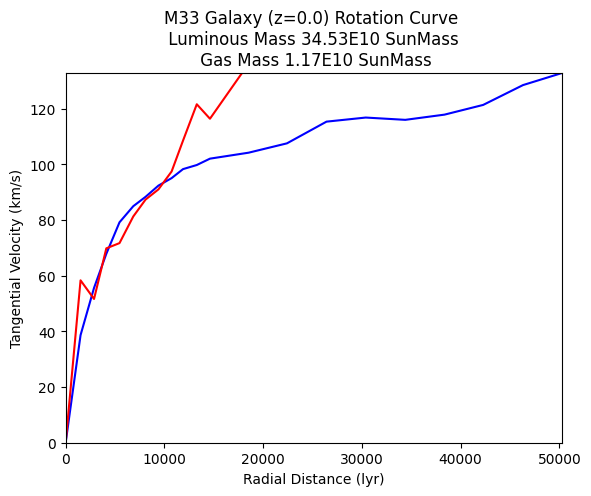

M0 = 16.4332
M1 = 1.01679
Total SummedUp Mass Calculated from summing up cells 16.5357


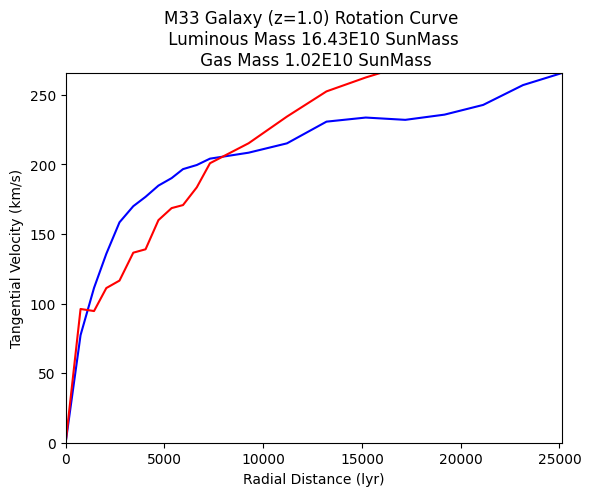

M0 = 10.6433
M1 = 0.934375
Total SummedUp Mass Calculated from summing up cells 10.9797


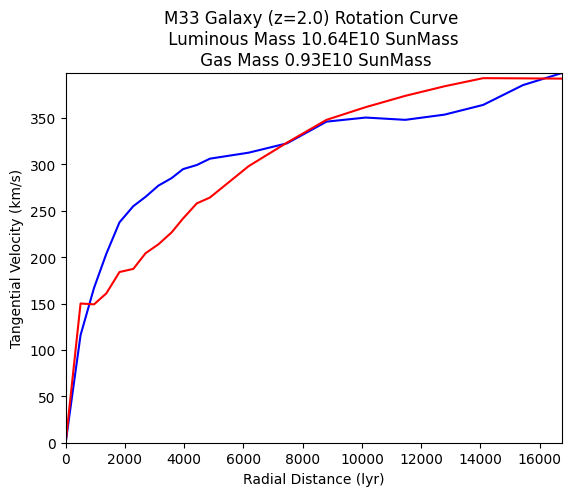

M0 = 7.82044
M1 = 0.879986
Total SummedUp Mass Calculated from summing up cells 8.25544


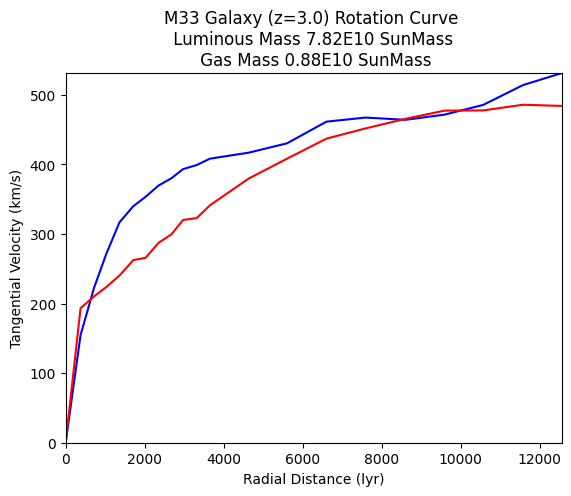

M0 = 6.15761
M1 = 0.839988
Total SummedUp Mass Calculated from summing up cells 6.64234


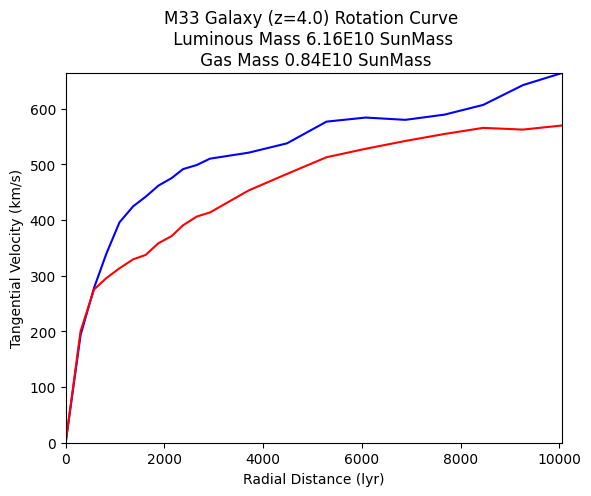

M0 = 5.06507
M1 = 0.808661
Total SummedUp Mass Calculated from summing up cells 5.57728


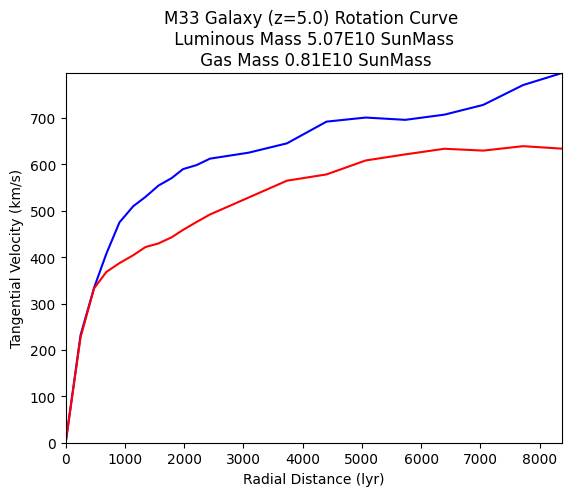

M0 = 4.29404
M1 = 0.783088
Total SummedUp Mass Calculated from summing up cells 4.82212


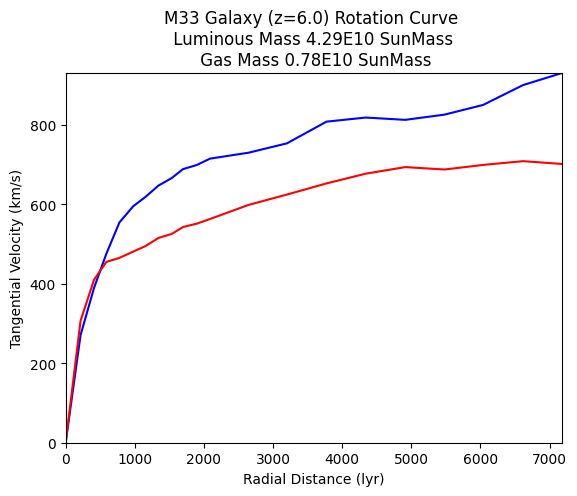

M0 = 3.72169
M1 = 0.76159
Total SummedUp Mass Calculated from summing up cells 4.25902


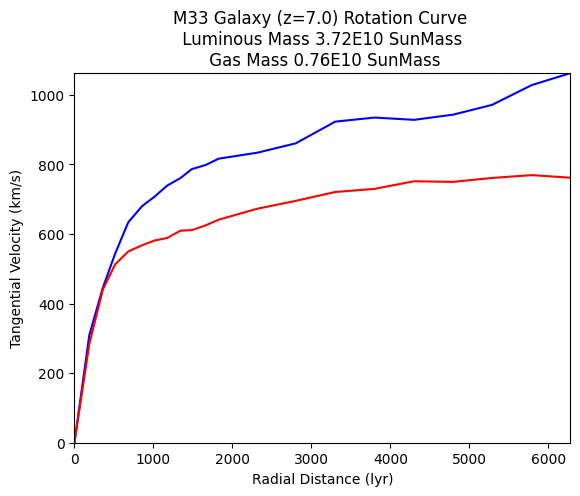

M0 = 3.2805
M1 = 0.743118
Total SummedUp Mass Calculated from summing up cells 3.82307


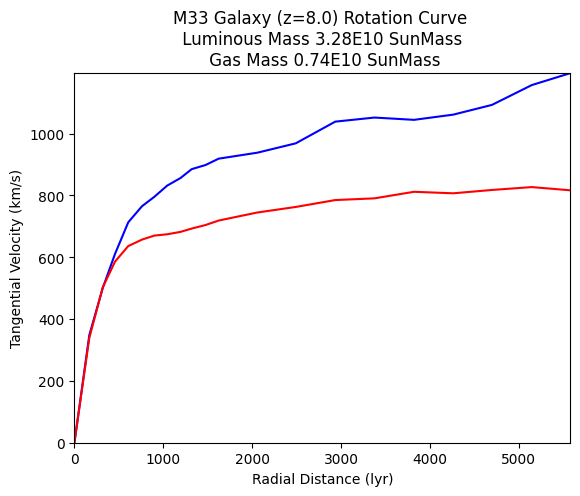

M0 = 2.93036
M1 = 0.726974
Total SummedUp Mass Calculated from summing up cells 3.47561


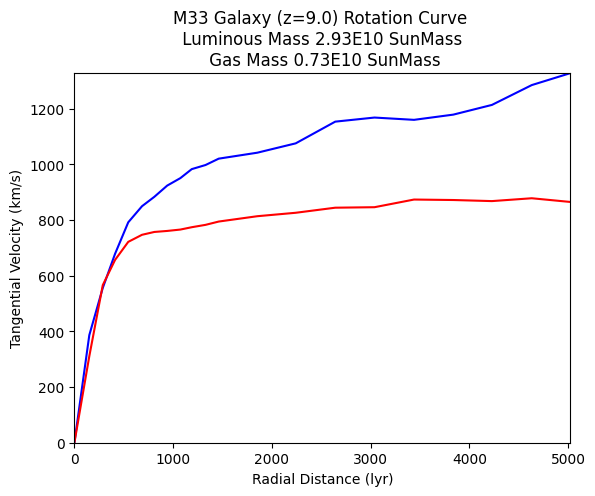

M0 = 2.64592
M1 = 0.712672
Total SummedUp Mass Calculated from summing up cells 3.19219


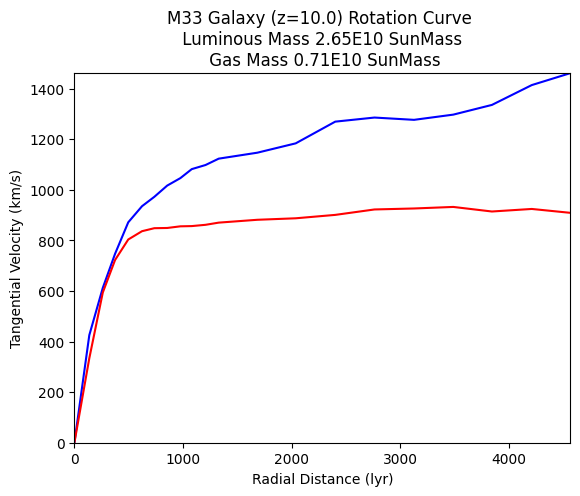

M0 = 2.41043
M1 = 0.699862
Total SummedUp Mass Calculated from summing up cells 2.95658


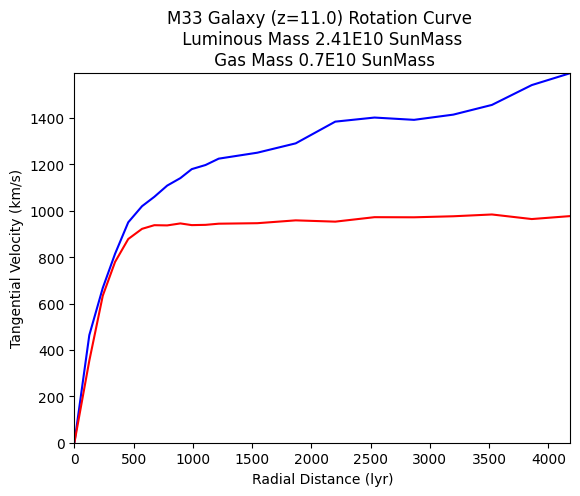

M0 = 2.21235
M1 = 0.688281
Total SummedUp Mass Calculated from summing up cells 2.75761


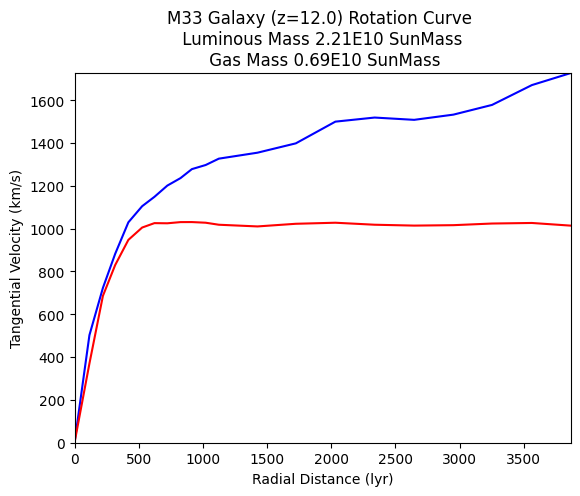

M0 = 2.0435
M1 = 0.677729
Total SummedUp Mass Calculated from summing up cells 2.58734


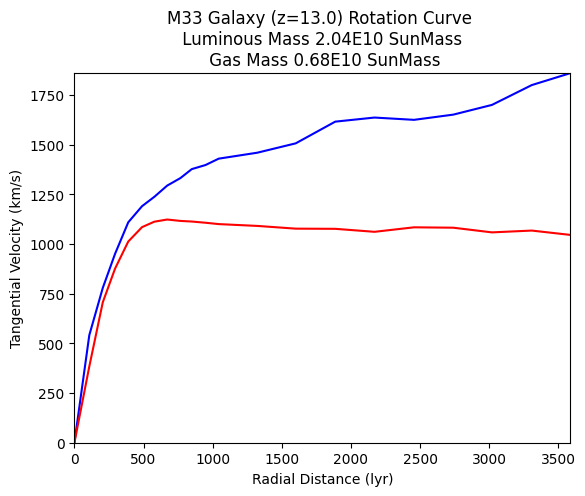

M0 = 1.89791
M1 = 0.668051
Total SummedUp Mass Calculated from summing up cells 2.43996


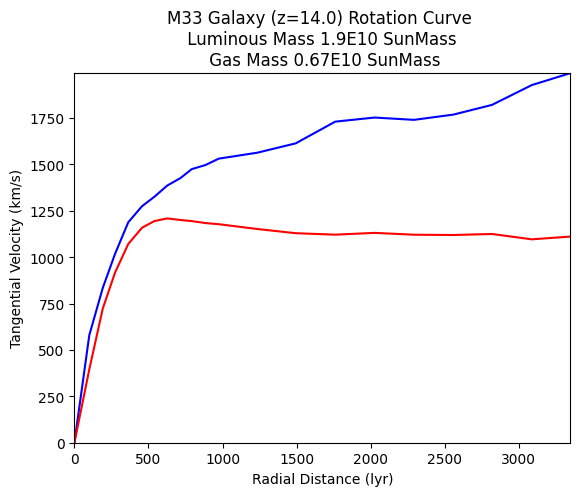

M0 = 1.77112
M1 = 0.659123
Total SummedUp Mass Calculated from summing up cells 2.31113


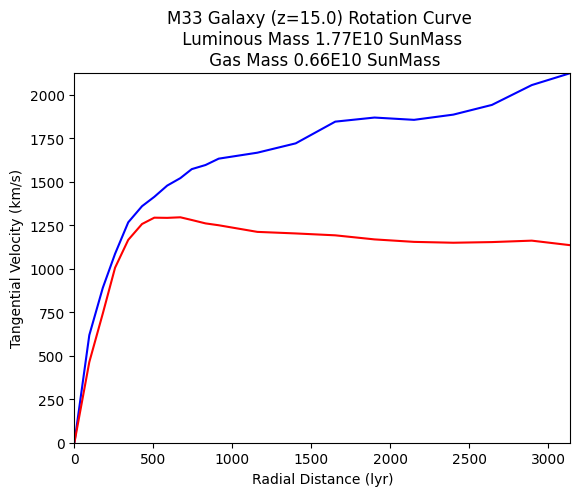

M0 = 1.65975
M1 = 0.650846
Total SummedUp Mass Calculated from summing up cells 2.19754


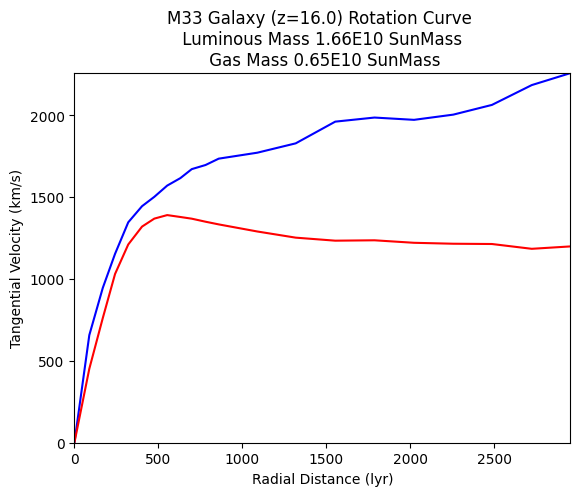

M0 = 1.56117
M1 = 0.643137
Total SummedUp Mass Calculated from summing up cells 2.09662


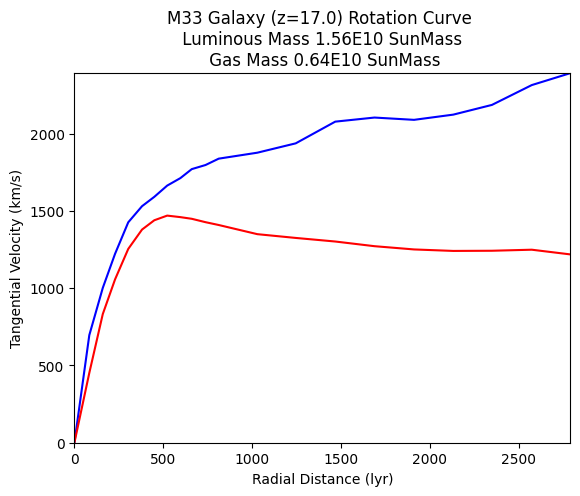

M0 = 1.47331
M1 = 0.635928
Total SummedUp Mass Calculated from summing up cells 2.00636


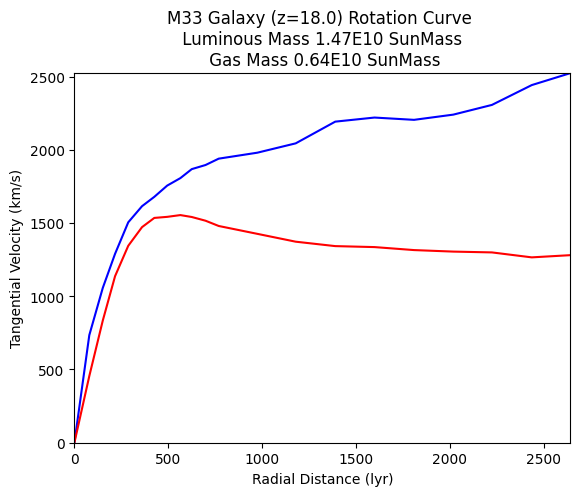

M0 = 1.39453
M1 = 0.629165
Total SummedUp Mass Calculated from summing up cells 1.92513


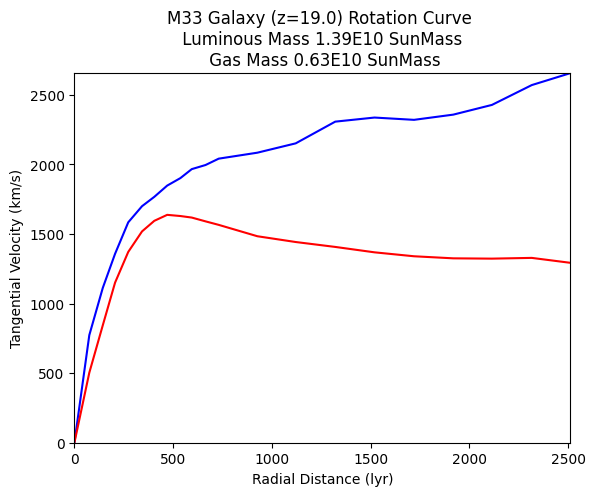

In [1]:
#  JUST PLOT THE PREDICTION

from hugalaxy import GalaxyWrapper, calculate_density_parameters, move_rotation_curve
from hugalaxy.plotting import plotRotationCurve
import numpy as np
import pandas as pd
Radius_4D=14.01


m33_rotational_curve = np.array( [
    [0.0, 0.0],
    [1508.7187, 38.674137],
    [2873.3889, 55.65067],
    [4116.755, 67.91063],
    [5451.099, 79.22689],
    [6846.0957, 85.01734],
    [8089.462, 88.38242],
    [9393.48, 92.42116],
    [10727.824, 95.11208],
    [11880.212, 98.342697],
    [13275.208, 99.82048],
    [14609.553, 102.10709],
    [18521.607, 104.25024],
    [22403.336, 107.60643],
    [26406.369, 115.40966],
    [30379.076, 116.87875],
    [34382.107, 116.05664],
    [38354.813, 117.93005],
    [42266.87, 121.42091],
    [46300.227, 128.55017],
    [50212.285, 132.84966]
])

print(np.shape(m33_rotational_curve))

M33_Distance = 3.2E6
Radius_Universe_4D = 14.01E9
redshift = M33_Distance / (Radius_Universe_4D - M33_Distance)
nr = 320
# NZ should always be ODD
nz = 101
ntheta = 180
R_max = 50000.0

rho_0, alpha_0, rho_1, alpha_1, h0 = calculate_density_parameters(redshift)
GalaxyMass = 5E10
# Create The Galaxy
M33 = GalaxyWrapper(GalaxyMass, rho_0, alpha_0, rho_1, alpha_1, h0, R_max, nr,
                    nz, ntheta, redshift,GPU_ID=0, cuda=True, taskflow=True)

M33_Distance = 3.2E6
Radius_Universe_4D = 14.03E9
redshift = M33_Distance / (Radius_Universe_4D - M33_Distance)

n=20
df = pd.DataFrame(index=np.arange(n), columns=["rho_0","alpha_0", "rho_1", "alpha_1", "h0", "M0", "M1"])


for redshift_birth in np.arange(n):
    r4d = 14/(1+redshift_birth)
    M33.redshift=redshift_birth
    new_rotation_curve = move_rotation_curve(m33_rotational_curve, redshift, redshift_birth )
    M33.read_galaxy_rotation_curve(new_rotation_curve)
    M33.move_galaxy_redshift(redshift_birth)
#     values = M33.simulate_rotation_curve()
#     values = np.append(values, [M33.calculate_mass(M33.rho_0, M33.alpha_0, M33.h0)/GalaxyMass, M33.calculate_mass(M33.rho_1, M33.alpha_1, M33.h0)/GalaxyMass])
#     df.loc[redshift_birth]=values
    M33.calculate_rotational_velocity(M33.rho,0.0)
    plotRotationCurve(M33)
  

# r4d = Radius_4D/(1+df.index)
# df["redshift_birth"]=df.index
# df["r4d"]=r4d
# # Assuming you have the DataFrame df with the required columns

# # Calculate log(r4d) column
# df['log_r4d'] = np.log10(14 / (1 + df['redshift_birth']))
# # Define the degree of the polynomial fit
# degree = 1

# # Create an empty dictionary to store the fitting coefficients
# fitting_coeffs = {}

# # Loop over the columns to calculate the fitting coefficients
# for column in ['rho_0', 'alpha_0', 'rho_1', 'alpha_1', 'h0']:
#     # Calculate log(column) column
# #     df['log_' + column] = np.log10(df[column])
#     df['log_' + column] = np.log10(df[column].to_numpy())


#     # Perform the polynomial fit using numpy.polyfit
#     fit_coeffs = np.polyfit(df['log_r4d'], df['log_' + column], degree)

#     # Store the fitting coefficients in the dictionary
#     fitting_coeffs[column] = fit_coeffs

# # Print the fitting coefficients
# for column, coeffs in fitting_coeffs.items():
#     print('pow(r4d, {}) * pow(10, {}),'.format(coeffs[0],coeffs[1]))


In [ ]:
df
